# Lecture 10

## References

* Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2nd Edition), Robert Johansson.  

## This Lecture
* Numerical Integration for 1D functions: $y=f(x)$

## Numerical Integration

Numerical Integration is also known as quadrature.

**Derivation**:

Given $n+1$ equally spaced data points: $(x_i,f(x_i))$ for $i=0,1,2,\dots,n$, the interpolating polynomial is 
$$
p_n(x) = \sum_{i=0}^{n+1}f(x_i) l_i(x),
$$
where $l_i(x)$  is the Lagrange basis function defined by 
$$
l_i{(x)} =\prod_{k=0\\k\neq i}^{n+1}\frac{(x-x_k)}{(x_j-x_k)}.
$$

The degree $n$ polynomial is an approxmation of the function $f(x)$. 


Integrating $p_n(x)$ results the Newton-Cotes formulas:
$$
J(f) = \sum_{i=0}^{n+1}f(x_i) \int_a^b l_i(x) dx \approx  \int_a^bf(x)dx
$$

## Some commonly used Newton-Cotes formulas:

* Middle Point Rule
$$
 \int_a^bf(x)dx \approx (b-a)f\left(\frac{a+b}{2}\right)
$$

* Trapzoidal Rule
$$
 \int_a^bf(x)dx \approx \frac{b-a}{2}\left[f(a)+f(b)\right]
$$

* Simposons Rule

$$
 \int_a^bf(x)dx \approx \frac{b-a}{6}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]
$$






In [1]:
#import moduels
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

## <font color=blue> Example </font>:  Implement the Above Rules



In [2]:
def middlePointRule(y,dx):
    #input:
    # y:  function value at the middle point
    # dx: spacing of the interval 
    numberOfDataPoints=len(y)
    assert len(dx)==numberOfDataPoints,"Error: lengths of dx and y are not equal"
    assert numberOfDataPoints>=1, "Error: we need at least one data points to use Middle Point Rule"
    J=0.
    for i in range(numberOfDataPoints):
        J+=dx[i]*y[i]  # (b-a)*f((a+b)/2)
                    
    return J

In [3]:
def trapzoidalRule(y,x):
    #input:
    # y:  function (y) value at the data point
    # x: x coordinates at the data point
    numberOfDataPoints=len(y)
    assert len(x)==numberOfDataPoints,"Error: lengths of x and y are not equal"
    assert numberOfDataPoints>=2, "Error: we need at least two data points to use Trapzoidal Rule"
    J=0.
    for i in range(numberOfDataPoints-1):
        J+=0.5*(x[i+1]-x[i])*(y[i]+y[i+1]) # 0.5*(b-a)*(f(a)+f(b))
    
    return J

In [4]:
def simpsonsRule(y,x):
    #input:
    # y:  function (y) value at the data point
    # x:  x coordinates at the data point
    numberOfDataPoints=len(y)
    assert len(x)==numberOfDataPoints,"Error: lengths of x and y are not equal"
    assert numberOfDataPoints>=3, "Error: we need at least three data points to use Simpsons Rule"
    assert numberOfDataPoints%2==1, "Error: we need an odd number of data points to use Simpsons Rule"
    
    numberOfSubintervalPairs=int((numberOfDataPoints-1)/2) #  we use pair of subintervals for simpsons rule
    J=0.
    for i in range(numberOfSubintervalPairs):
        a,fa=x[2*i],y[2*i]
        c,fc=x[2*i+1],y[2*i+1]
        b,fb=x[2*i+2],y[2*i+2]     
        J+=(b-a)/6.0*(fa+4.*fc+fb)
    
    return J


Test the above functions: 

Estimate 
$$
\int_{0}^{2} e^xdx. 
$$
We knonw the exact solution is 
$$
I  = e^x \vert_{0}^2 = e^2-1 \approx 6.38905609893065
$$


In [5]:
f = lambda x: np.exp(x) # define the integrand

In [6]:
x = np.array([1.]) # middle point
y=f(x)  # function value at middle point
dx= np.array([2.])  # width of interval
Jmp1 = middlePointRule(y,dx) #middle point rule with only 1 data point

In [7]:
x = np.array([0.,2.])
y=f(x) 
Jtz2 = trapzoidalRule(y,x) #trapzoidal rule with only 2 data points

In [8]:
x = np.array([0.,1.,2.])
y=f(x)
Jsp3=simpsonsRule(y,x) #simpsons rule with only 3 data points

In [9]:
print("Middle Point Rule: %f\nTrapzoidal Rule: %f\nSimpsons Rule:%f\n"%(Jmp1,Jtz2,Jsp3)) # print results

Middle Point Rule: 5.436564
Trapzoidal Rule: 8.389056
Simpsons Rule:6.420728



So what is going on here? Let's visualize the quadrature rules

In [10]:
# data points involved
x= np.array([0.,1.,2.]) 
y=f(x)

xx=np.linspace(0,2,100) # oversampled grids for plotting
yy=f(xx)

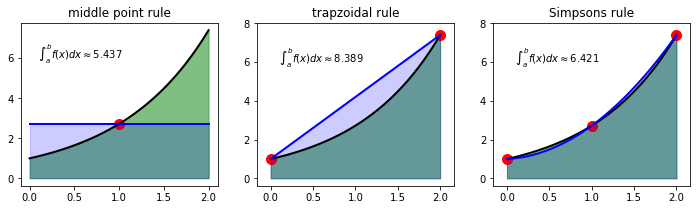

In [11]:
figs,axes=plt.subplots(1,3,figsize=(12, 3)) # figsize=(width,height) in inches

# plot middle point rule
axes[0].plot(xx,yy,'k',lw=2)
axes[0].fill_between(xx,yy,color='g',alpha=.5)  # alpha controls the opacity of a color
axes[0].scatter(np.array(x[1]),np.array(y[1]),c='red',s=100)  # red color, size 100 points
fmp=interpolate.interp1d(x,y[1]+np.zeros(3),kind='nearest') # zeroth order interpolation 
axes[0].plot(xx,fmp(xx),color='b',lw=2)  # interpolating polynomial
axes[0].fill_between(xx,fmp(xx),color='b',alpha=0.2)  # alpha controls the opacity of a color
axes[0].set_title('middle point rule')
axes[0].text(0.1, 6, r'$\int_a^bf(x)dx \approx %.3f$'%Jmp1)



# plot trapzoidal rule
axes[1].plot(xx,yy,'k',lw=2)
axes[1].fill_between(xx,yy,color='g',alpha=0.5)  # alpha controls the opacity of a color
axes[1].scatter(x[[0,2]],y[[0,2]],c='red',s=100)  # red color, size 100 points
ftp=interpolate.interp1d(x[[0,2]],y[[0,2]],kind='linear') # linear interpolation 
axes[1].plot(xx,ftp(xx),color='b',lw=2)  # interpolating polynomial
axes[1].fill_between(xx,ftp(xx),color='b',alpha=0.2)  # alpha controls the opacity of a color
axes[1].set_title('trapzoidal rule')
axes[1].text(0.1, 6, r'$\int_a^bf(x)dx \approx %.3f$'%Jtz2)




# plot simpsons rule
axes[2].plot(xx,yy,'k',lw=2)
axes[2].fill_between(xx,yy,color='g',alpha=0.5)  # alpha controls the opacity of a color
axes[2].scatter(x,y,c='red',s=100)  # red color, size 100 points
ftp=interpolate.interp1d(x,y,kind=2) # quadratic interpolation 
axes[2].plot(xx,ftp(xx),color='b',lw=2)  # interpolating polynomial
axes[2].fill_between(xx,ftp(xx),color='b',alpha=0.2)  # alpha controls the opacity of a color
axes[2].set_title('Simpsons rule')
axes[2].text(0.1, 6, r'$\int_a^bf(x)dx \approx %.3f$'%Jsp3)



plt.show()




We can improve the results by adding more data points (composite rules). 
Consider using 4 subintervals for the three rules

In [12]:
xmp = np.array([0.25,0.75,1.25,1.75])
ymp = f(xmp)
dxmp = np.array([0.5,0.5,0.5,0.5])
Jmp=middlePointRule(ymp,dxmp) #middle point rule rule using 4 subintervals

In [13]:
xdata = np.array([0.,0.5,1.0,1.5,2.0])
ydata = f(xdata)
Jtz=trapzoidalRule(ydata,xdata) #trapzoidal rule using 4 subintervals
Jsp=simpsonsRule(ydata,xdata) #simpsons rule using 4 subintervals

In [14]:
print("Middle Point Rule: %f\nTrapzoidal Rule: %f\nSimpsons Rule:%f\n"%(Jmp,Jtz,Jsp)) # print results

Middle Point Rule: 6.322986
Trapzoidal Rule: 6.521610
Simpsons Rule:6.391210



Visualization

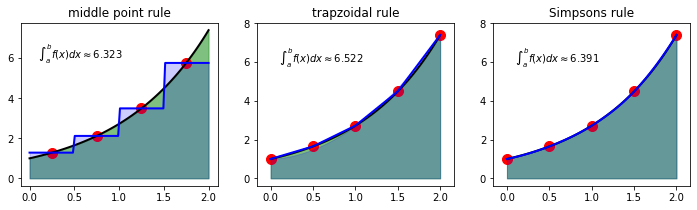

In [15]:
figs,axes=plt.subplots(1,3,figsize=(12, 3)) # figsize=(width,height) in inches

# plot middle point rule
axes[0].plot(xx,yy,'k',lw=2)
axes[0].fill_between(xx,yy,color='g',alpha=0.5)  # alpha controls the opacity of a color
axes[0].scatter(xmp,ymp,c='red',s=100)  # red color, size 100 points
xmpi=np.insert(xmp,[0,xmp.size],[0.,2.]) # adding end points to plot the interp
ympi=np.insert(ymp,[0,ymp.size],[f(0.25),f(1.75)])# adding end points to plot the interp
fmp=interpolate.interp1d(xmpi,ympi,kind='nearest') # zeroth order interpolation 
axes[0].plot(xx,fmp(xx),color='b',lw=2)  # interpolating polynomial
axes[0].fill_between(xx,fmp(xx),color='b',alpha=0.2)  # alpha controls the opacity of a color
axes[0].set_title('middle point rule')
axes[0].text(0.1, 6, r'$\int_a^bf(x)dx \approx %.3f$'%Jmp)




# plot trapzoidal rule
axes[1].plot(xx,yy,'k',lw=2)
axes[1].fill_between(xx,yy,color='g',alpha=0.5)  # alpha controls the opacity of a color
axes[1].scatter(xdata,ydata,c='red',s=100)  # red color, size 100 points
ftz=interpolate.interp1d(xdata,ydata,kind='linear') # linear interpolation 
axes[1].plot(xx,ftz(xx),color='b',lw=2)  # interpolating polynomial
axes[1].fill_between(xx,ftp(xx),color='b',alpha=0.2)  # alpha controls the opacity of a color
axes[1].set_title('trapzoidal rule')
axes[1].text(0.1, 6, r'$\int_a^bf(x)dx \approx %.3f$'%Jtz)




# plot simpsons rule
axes[2].plot(xx,yy,'k',lw=2)
axes[2].fill_between(xx,yy,color='g',alpha=0.5)  # alpha controls the opacity of a color
axes[2].scatter(xdata,ydata,c='red',s=100)  # red color, size 100 points
fsp=interpolate.interp1d(xdata,ydata,kind=2) # quadratic interpolation 
axes[2].plot(xx,fsp(xx),color='b',lw=2)  # interpolating polynomial
axes[2].fill_between(xx,fsp(xx),color='b',alpha=0.2)  # alpha controls the opacity of a color
axes[2].set_title('Simpsons rule')
axes[2].text(0.1, 6, r'$\int_a^bf(x)dx \approx %.3f$'%Jsp)


plt.show()

